# Прогнозирование сердечной недостаточности

## Практическая Работа 1

### Описание датасета

Сердечно-сосудистые заболевания (ССЗ) являются причиной смерти номер 1 во всем мире, унося ежегодно 17,9 миллиона жизней, что составляет 31% всех смертей в мире. Четыре из пяти случаев смерти от ССЗ связаны с инфарктами и инсультами, и одна треть этих смертей происходит преждевременно у людей в возрасте до 70 лет. Сердечная недостаточность - распространенное явление, вызванное ССЗ, и этот набор данных содержит 11 признаков, которые могут быть использованы для прогнозирования возможного заболевания сердца. <br>
Люди с сердечно-сосудистыми заболеваниями или с высоким сердечно-сосудистым риском (из-за наличия одного или нескольких факторов риска, таких как гипертония, диабет, гиперлипидемия или уже установленное заболевание) нуждаются в раннем выявлении и лечении, и здесь модель машинного обучения может оказать большую помощь.

### Описание признаков

Age: возраст пациента [годы] <br> 
Sex: пол пациента [M: мужской, F: женский] <br>
ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная]<br>
RestingBP: артериальное давление в состоянии покоя [мм рт. ст.]<br>
Cholesterol: уровень холестерина в сыворотке крови [мм/дл]<br>
FastingBS: сахар крови натощак [1: если FastingBS > 120 мг/дл, 0: иначе] <br>
RestingECG: результаты электрокардиограммы в состоянии покоя [Normal: норма, ST: наличие аномалии ST-T (инверсии T-волны и/или повышение или понижение ST > 0,05 мВ), LVH: вероятная или определенная гипертрофия левого желудочка по критериям Estes].<br>
MaxHR: максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202].<br>
ExerciseAngina: стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]<br>
Oldpeak: oldpeak = ST [Числовое значение, измеренное в депрессии]<br>
ST_Slope: наклон пикового сегмента ST при физической нагрузке [Up: восходящий, Flat: плоский, Down: нисходящий].<br>
HeartDisease: выходной класс [1: болезнь сердца, 0: норма]<br>

### Цель практической работы
На основе датасета построить модель классификации наличия сердечной недостаточности.

### Начальный этап
Загрузка необходимых библиотек.

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [2]:
url = 'https://raw.githubusercontent.com/Oskg/ML_2023/main/heart.csv'
data_raw = pd.read_csv(url)

Рассмотрим количество измерений - строки и признаков - столбцы

In [3]:
data_raw.shape

(918, 12)

Рассмотрим первые пять строк

In [4]:
data_raw.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Сводная информация о датасете:

In [5]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data_raw.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
data_raw.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
data_raw.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
data_raw.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
data_raw.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [11]:
data_raw.mean(numeric_only=True)

Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64

In [12]:
data_raw.std(numeric_only=True)

Age               9.432617
RestingBP        18.514154
Cholesterol     109.384145
FastingBS         0.423046
MaxHR            25.460334
Oldpeak           1.066570
HeartDisease      0.497414
dtype: float64

### Визуализация имеющихся данных

Построим столбчатую диаграмму по признаку наличия сердечной недостаточности в датасете

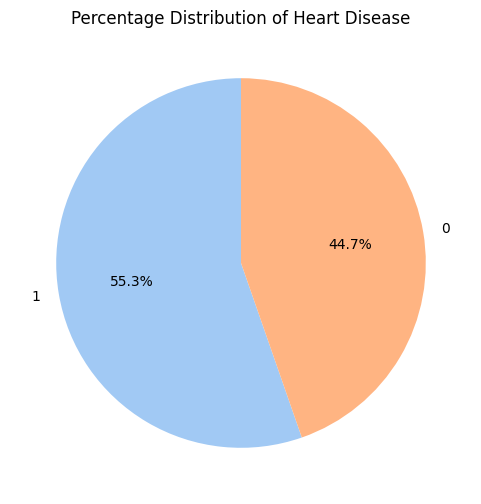

In [13]:
heart_disease_counts = data_raw['HeartDisease'].value_counts()
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Heart Disease')
plt.show()

Можно заметить, что датасет сбалансирован, количество записей о найденной сердечной недостаточности (1) приблизительно равно количеству записей об отсутствии сердечной недостаточности(0).

Построим корелляционную матрицу

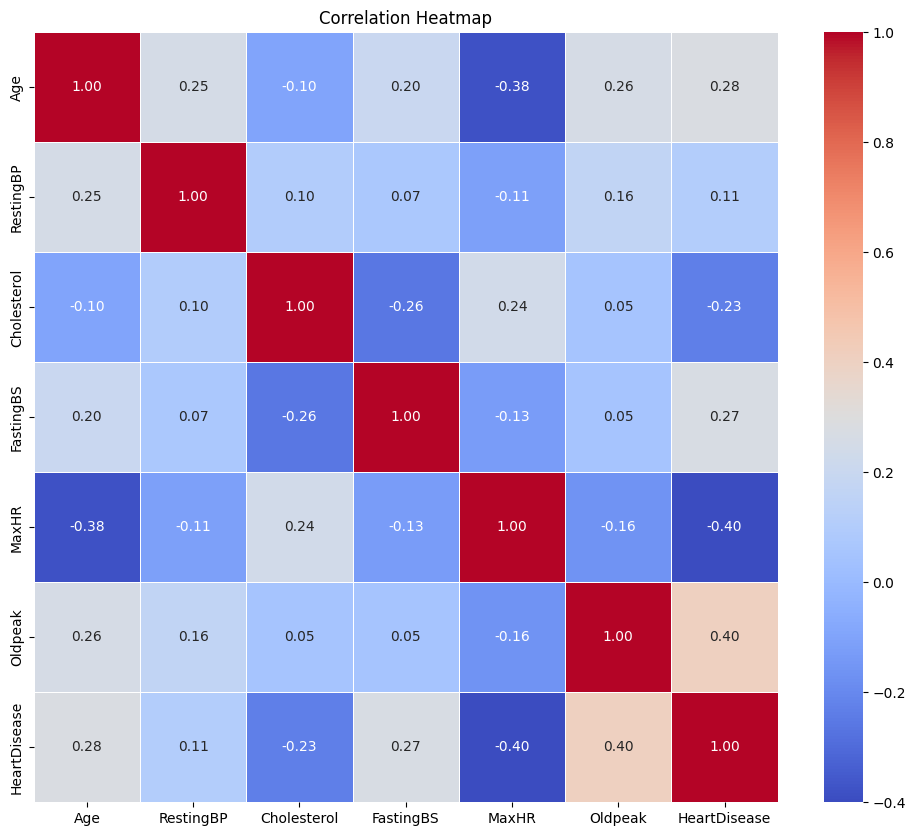

In [14]:
numeric_columns = data_raw.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_raw[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Из корелляционной матрицы видно, что наличие сердечной недостаточности сильно кореллирует с возрастом, а в меньшей степени с <br>
сахором в крови на тощак и артериальным давлением в состоянии покоя. <br> Что странно, наличие сердечной недостаточности слабо кореллирует с количеством холестерина.

Преобразуем категориальные признаки в числовые

In [15]:
data_raw = pd.get_dummies(data_raw, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

Проверим пропущенные значения и если они есть, заполним их средним значением.

In [16]:
# Проверка пропущенных значений
missing_values = data_raw.isnull().sum()
print(missing_values)
data_raw.fillna(data_raw.mean(), inplace=True)

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64


К счастью, пропущенных значений не было обнаружено

Проводим нормализацию значений, она необходима так как в моем случае для разных признаков используются разные единицы измерения и без нормализации метод ближайших соседей будет работать некорректно.

In [17]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
data_raw[numerical_features] = scaler.fit_transform(data_raw[numerical_features])
data_raw

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,0,-0.188999,0.293283,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,1.536902,0.627078,-0.053049,1,0.164684,2.357094,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,0.370100,-0.129513,-0.620168,0,-0.857069,0.293283,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,0.370100,-0.129513,0.340275,0,1.461525,-0.832432,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


Разобьем данные на обучающую и тестовую выборки

In [18]:
from sklearn.model_selection import train_test_split

X = data_raw.drop('HeartDisease', axis=1)
y = data_raw['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
print(X_train.shape)
print(X_test.shape)

(642, 20)
(276, 20)


Метод kNN <br> Возмем изначальное количество соседей равным 5.


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Предсказания на обучающей и тестовой выборках
train_preds = knn_classifier.predict(X_train)
test_preds = knn_classifier.predict(X_test)

# Оценка точности
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f'Train Accuracy: {train_accuracy:.6f}')
print(f'Test Accuracy: {test_accuracy:.6f}')

# Classification report
print('Classification Report on Test Data:')
print(classification_report(y_test, test_preds))


Train Accuracy: 0.892523
Test Accuracy: 0.855072
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       126
           1       0.85      0.89      0.87       150

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



Интерпретация результатов классификации с количеством соседей (k) равным 5:

1. **Обучающая точность (Train Accuracy):** 89.25%
   - Это процент правильных предсказаний на обучающей выборке. Модель хорошо справляется с данными, используемыми для обучения.

2. **Тестовая точность (Test Accuracy):** 85.51%
   - Это процент правильных предсказаний на тестовой выборке. Тестовая точность хороша, но немного ниже обучающей точности, что может указывать на небольшое переобучение.

3. **Classification Report:**
   - **Precision (точность):** 86% и 85% для классов 0 и 1 соответственно. Это процент правильных предсказаний среди объектов, которые модель отнесла к данному классу. Например, для класса 0 модель правильно предсказала 86% объектов, которые действительно принадлежат классу 0.
   - **Recall (полнота):** 82% и 89% для классов 0 и 1 соответственно. Это процент объектов данного класса, которые модель правильно предсказала. Например, для класса 1 модель правильно предсказала 89% объектов, которые действительно принадлежат классу 1.
   - **F1-score (F-мера):** 84% и 87% для классов 0 и 1 соответственно. F1-score объединяет точность и полноту в одну метрику, учитывая их гармоническое среднее.
   - **Support:** Количество объектов каждого класса в тестовой выборке.

4. **Выводы:**
   - Модель достигает неплохой точности на тестовой выборке, но стоит обратить внимание на разницу между обучающей и тестовой точностью. Это может свидетельствовать о некотором переобучении модели.
   - Precision, recall и F1-score для обоих классов также довольно близки, что говорит о сбалансированности модели.

Попробуем улучшить точность модели, подбором оптимального количества блиайших соседей:

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 31))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f'Best value for k: {best_k}')

# Повторное обучение с оптимальным значением k
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

# Оценка ошибок
train_preds = knn_classifier.predict(X_train)
test_preds = knn_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f'Train Accuracy: {train_accuracy:.6f}')
print(f'Test Accuracy: {test_accuracy:.6f}')
print('Classification Report on Test Data:')
print(classification_report(y_test, test_preds))


Best value for k: 25
Train Accuracy: 0.869159
Test Accuracy: 0.865942
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       126
           1       0.86      0.91      0.88       150

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



Интерпретация результатов после нахождения оптимального количества соседей (k=25):

1. **Обучающая точность (Train Accuracy):** 86.92%
   - Это процент правильных предсказаний на обучающей выборке с использованием оптимального значения k. Обучающая точность снизилась по сравнению с предыдущим значением k (k=5), что может указывать на лучшую обобщающую способность модели.

2. **Тестовая точность (Test Accuracy):** 86.59%
   - Это процент правильных предсказаний на тестовой выборке с использованием оптимального значения k. Тестовая точность осталась примерно на том же уровне, что и сса в тестоводля новых данных. с k=5.

3. **Classification Report:**
   - **Precision (точность):** 88% и 86% для классов 0 и 1 соответственно. Это процент правильных предсказаний среди объектов, которые модель отнесла к данному классу.
   - **Recall (полнота):** 82% и 91% для классов 0 и 1 соответственно. Это процент объектов данного класса, которые модель правильно предсказала.
   - **F1-score (F-мера):** 85% и 88% для классов 0 и 1 соответственно. F1-score объединяет точность и полноту в одну метрику, учитывая их гармоническое среднее.
   - **Support:** Количество объектов каждого класса в тестовой выборке

4. **Выводы:**
   - Модель с k=25 продемонстрировала хорошие результаты, сохраняя стабильную тестовую точность.
   - Точность, полнота и F1-score для обоих классов также остаются на высоком уровне, указывая на сбалансированность модели.
   - Важно отметить, что тестовая точность при этом значении k осталась стабильной, а обучающая точность уменьшилась, что может свидетельствовать о лучшей обобщающей способности модели для новых данных.

### Итог
В рамках практической работы 1 мне удалось решить задачу классификации и обучить модель, предсказывающую наличие сердечной недостаточности у пациентов с относительно высокой точностью.

# Практическая работа 2

Произведем импорт необходимых библиотек

In [21]:
# Импорт необходимых библиотек
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

Логистическая регрессия

Logistic Regression:
Train Accuracy: 0.869159
Test Accuracy: 0.880435
Confusion Matrix:


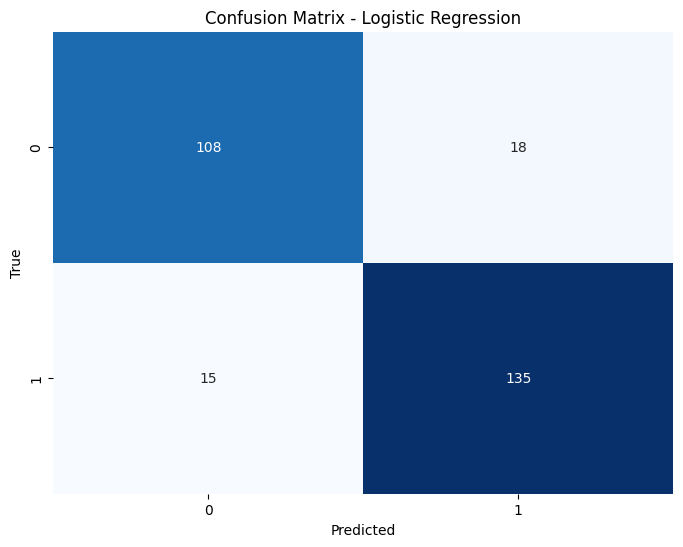

In [22]:
# Создание и обучение модели
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Предсказания
train_preds_logreg = logreg_model.predict(X_train)
test_preds_logreg = logreg_model.predict(X_test)

# Оценка точности
train_accuracy_logreg = accuracy_score(y_train, train_preds_logreg)
test_accuracy_logreg = accuracy_score(y_test, test_preds_logreg)

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, test_preds_logreg)

# Вывод результатов
print(f'Logistic Regression:')
print(f'Train Accuracy: {train_accuracy_logreg:.6f}')
print(f'Test Accuracy: {test_accuracy_logreg:.6f}')
# Вывод результатов с использованием тепловой карты
print('Confusion Matrix:')
conf_matrix_logreg = confusion_matrix(y_test, test_preds_logreg)

# Вывод матрицы ошибок как тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Модель Logistic Regression показывает хорошие результаты с точностью около 87% на обучающем и 88% на тестовом наборе данных. <br> Модель предсказывает классы достаточно хорошо, но есть небольшое количество ложных положительных и ложных отрицательных предсказаний, как видно из матрицы ошибок.

Случайный лес

RandomForest:
Train Accuracy: 1.000000
Test Accuracy: 0.891304


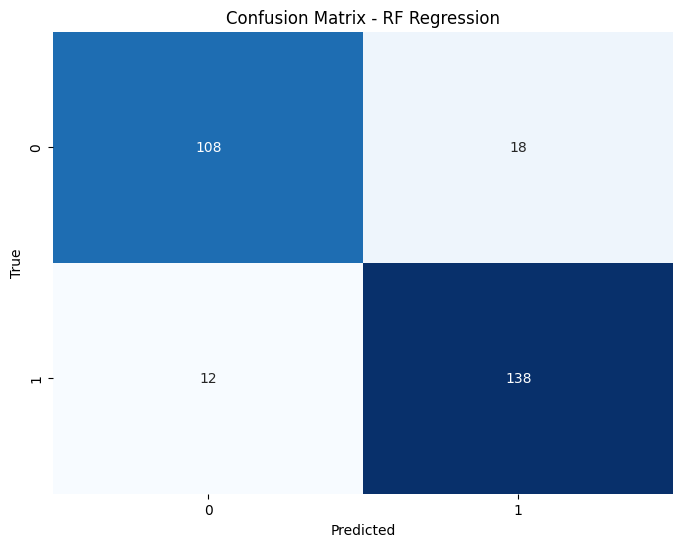

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Создание и обучение модели
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания
train_preds_rf = rf_model.predict(X_train)
test_preds_rf = rf_model.predict(X_test)

# Оценка точности
train_accuracy_rf = accuracy_score(y_train, train_preds_rf)
test_accuracy_rf = accuracy_score(y_test, test_preds_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, test_preds_rf)

# Вывод результатов
print(f'RandomForest:')
print(f'Train Accuracy: {train_accuracy_rf:.6f}')
print(f'Test Accuracy: {test_accuracy_rf:.6f}')
conf_matrix_rf = confusion_matrix(y_test, test_preds_rf)

# Вывод матрицы ошибок как тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - RF Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Случайный лес показывает отличные результаты на обучающем наборе, но при этом сохраняет хорошую обобщающую способность на тестовом наборе. 

Нейронная модель<br>
Обучим нейронную модель с 2мя слоями из (20,10) нейронов:

MLP Neural Network:
Train Accuracy: 0.996885
Test Accuracy: 0.865942
Confusion Matrix:


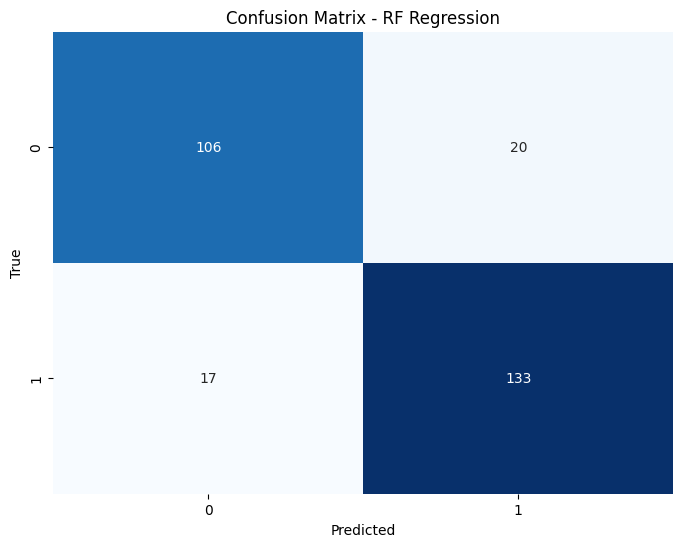

In [42]:
from sklearn.neural_network import MLPClassifier

# Создание и обучение модели
mlp_model = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=2500, random_state=42)
mlp_model.fit(X_train, y_train)

# Предсказания
train_preds_mlp = mlp_model.predict(X_train)
test_preds_mlp = mlp_model.predict(X_test)

# Оценка точности
train_accuracy_mlp = accuracy_score(y_train, train_preds_mlp)
test_accuracy_mlp = accuracy_score(y_test, test_preds_mlp)

# Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, test_preds_mlp)

# Вывод результатов
print(f'MLP Neural Network:')
print(f'Train Accuracy: {train_accuracy_mlp:.6f}')
print(f'Test Accuracy: {test_accuracy_mlp:.6f}')
print('Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - RF Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

У нейронной модели из 2х слоев, с 20 нейронами на первом и 10 на втором, худший результат среди прочих моделей. <br>
Точность на тестовых данных крайне близка к 1, что свидетельствует о переобучении. <br>
Количество ложноположительных и ложноотрицательных срабатываний также возросло. <br>
Давайте найдем оптимальные значения гиперпараметров (альфа, количество и размер слоев).

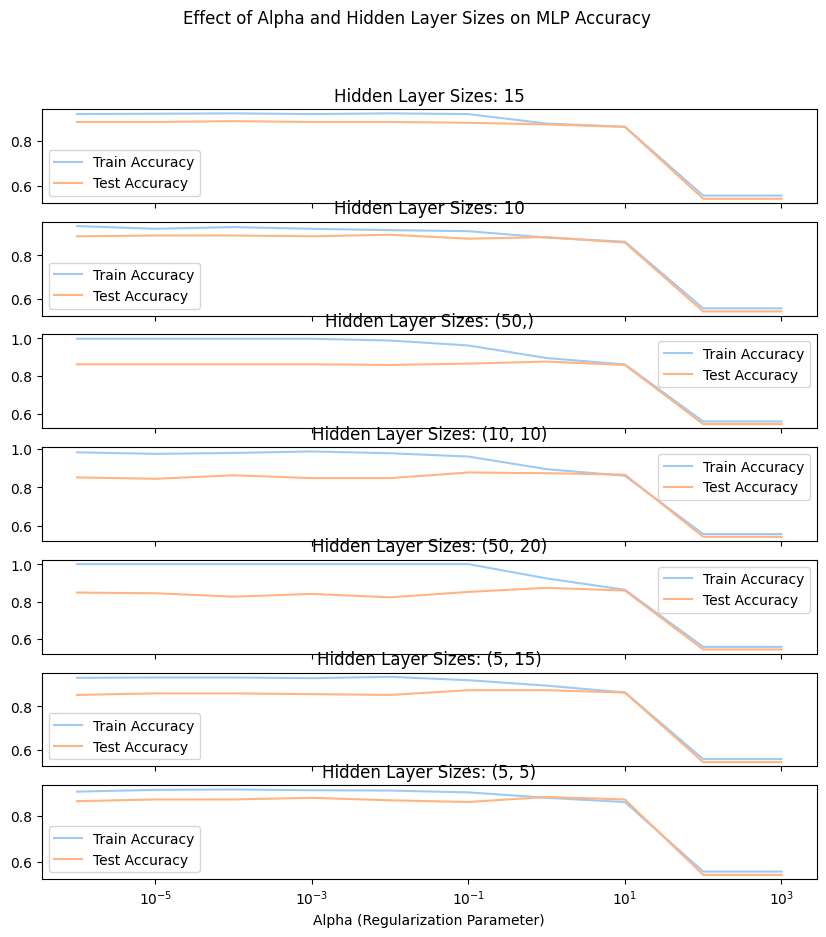

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Гиперпараметры для тестирования
alphas = np.logspace(-6, 3, 10)  # Используем логарифмическую шкалу для alpha
hidden_layer_sizes = [(15),(10), (50,), (10, 10), (50, 20), (5,15), (5,5)]

# Создание подзадач для каждого значения alpha и hidden_layer_sizes
train_accuracies = []
test_accuracies = []

for layer_size in hidden_layer_sizes:
    train_accuracies_alpha = []
    test_accuracies_alpha = []
    for alpha in alphas:
        mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=layer_size, max_iter=5000, random_state=42)
        mlp_model.fit(X_train, y_train)
        
        train_preds = mlp_model.predict(X_train)
        test_preds = mlp_model.predict(X_test)
        
        train_accuracies_alpha.append(accuracy_score(y_train, train_preds))
        test_accuracies_alpha.append(accuracy_score(y_test, test_preds))
    
    train_accuracies.append(train_accuracies_alpha)
    test_accuracies.append(test_accuracies_alpha)

# Построение графиков
fig, axs = plt.subplots(len(hidden_layer_sizes), 1, figsize=(10, 10), sharex=True)

for i, layer_size in enumerate(hidden_layer_sizes):
    axs[i].plot(alphas, train_accuracies[i], label='Train Accuracy')
    axs[i].plot(alphas, test_accuracies[i], label='Test Accuracy')
    axs[i].set_xscale('log')
    axs[i].set_title(f'Hidden Layer Sizes: {layer_size}')
    axs[i].legend()

plt.xlabel('Alpha (Regularization Parameter)')
plt.suptitle('Effect of Alpha and Hidden Layer Sizes on MLP Accuracy')
plt.show()


In [39]:
# Нахождение оптимальных значений
optimal_index = np.unravel_index(np.argmax(test_accuracies, axis=None), np.array(test_accuracies).shape)
optimal_alpha = alphas[optimal_index[1]]
optimal_layer_size = hidden_layer_sizes[optimal_index[0]]

print(f'Optimal Alpha: {optimal_alpha:.6f}')
print(f'Optimal Hidden Layer Sizes: {optimal_layer_size}')
print(f'Test Accuracy with Optimal Parameters: {test_accuracies[optimal_index[0]][optimal_index[1]]:.6f}')


Optimal Alpha: 0.010000
Optimal Hidden Layer Sizes: 10
Test Accuracy with Optimal Parameters: 0.894928


Как мы видим, оптимальное количество слоев - 1, а количества нейронов - 10. <br> Теперь нейронная модель показывает наилучшую точность среди остальных моделей.<br> 

### Вывод
- Все три модели (логистическая регрессия, Random Forest, MLP Neural Network) показали хорошие результаты с высокой точностью.
- Подбор оптимальных гиперпараметров для нейронной сети привел к улучшению её производительности, делая её наилучшим выбором среди рассмотренных моделей.
- Важно учитывать баланс между точностью и предотвращением переобучения, особенно при работе с небольшими объемами данных.